# Lab 5 - General Linear Models: Logistic regression

In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

#### Read data from csv file

In [2]:
data = pd.read_csv('logistic_reg_data.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,x1,x2,x3,x4,x5,y
0,-0.318816,0.101644,-3.240568e-02,1.033146e-02,-3.293836e-03,1
1,0.823793,0.678635,5.590543e-01,4.605449e-01,3.793936e-01,1
2,-0.948920,0.900449,-8.544537e-01,8.108081e-01,-7.693919e-01,0
3,-0.601142,0.361371,-2.172353e-01,1.305892e-01,-7.850259e-02,1
4,-0.008257,0.000068,-5.629723e-07,4.648534e-09,-3.838354e-11,1


In [3]:
data.describe()

,x1,x2,x3,x4,x5,y
count,500.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,500.000000
mean,-0.015777,0.334002,-0.001484,2.022817e-01,2.770684e-03,0.494000
std,0.578292,0.301507,0.383111,2.738984e-01,3.107472e-01,0.500465
min,-0.997592,0.000005,-0.992794,2.276756e-11,-9.880191e-01,0.000000
25%,-0.515144,0.064052,-0.136718,4.102616e-03,-3.628888e-02,0.000000
50%,-0.026042,0.254724,-0.000018,6.488454e-02,-1.278838e-08,0.000000
75%,0.475396,0.555544,0.107440,3.086316e-01,2.428165e-02,1.000000
max,0.999652,0.999305,0.998957,9.986100e-01,9.982628e-01,1.000000


### Prior selection


In [4]:
model_ppc1 = CmdStanModel(stan_file='logistic_regression_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [5]:
R=1000
data_ppc= dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=10)
sim_ppc1=model_ppc1.sample(data=data_ppc, 
                           iter_sampling=R, iter_warmup=0, 
                           chains=1, 
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


#### Task 1.

1. Plot histograms of beta for prior model
2. Plot again the same histograms but this time with other sigma values. For instace use values: 5, 2, 0.75.
3. Consider which result should be taken into account when selecting prior.

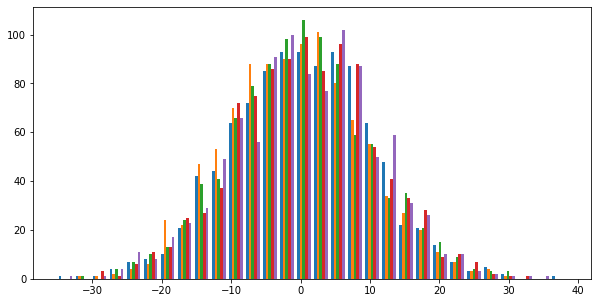

In [9]:
beta = sim_ppc1.stan_variable(var='beta')

plt.figure(figsize=(10,5))
plt.hist(beta, bins=30)
plt.show()

In [13]:
data_ppc= dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=5)
sim_ppc1=model_ppc1.sample(data=data_ppc, 
                           iter_sampling=R, iter_warmup=0, 
                           chains=1, 
                           refresh=R,
                           fixed_param=True,
                           seed=2904202)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


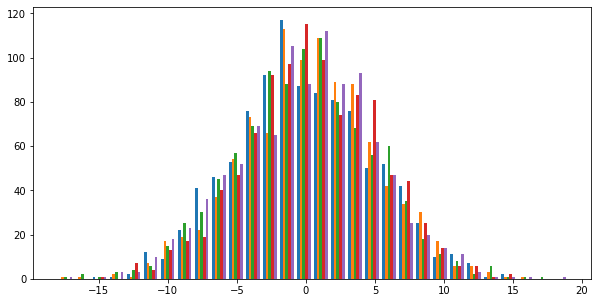

In [14]:
beta = sim_ppc1.stan_variable(var='beta')

plt.figure(figsize=(10,5))
plt.hist(beta, bins=30)
plt.show()

In [15]:
data_ppc= dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=2)
sim_ppc1=model_ppc1.sample(data=data_ppc, 
                           iter_sampling=R, iter_warmup=0, 
                           chains=1, 
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


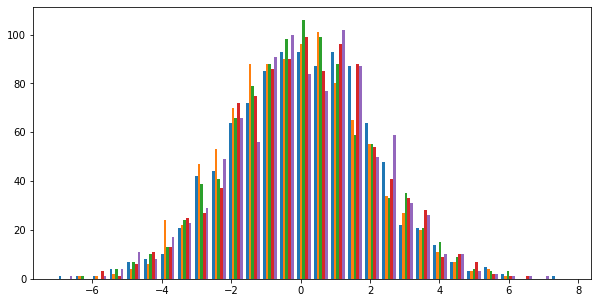

In [16]:
beta = sim_ppc1.stan_variable(var='beta')

plt.figure(figsize=(10,5))
plt.hist(beta, bins=30)
plt.show()

### Posterior inference

#### Task 2.

1. Edit stan model and create models with different priors. Use original setting and some priors from task 1.
2. Fit the model
3. Plot the probability of individual outcome:
- plot generated paramether theta (prob_pcc): mean with its error bars (plt.errorbar)
- to plot its error bars take into consider its 25th, 50th and 75th percentile
- also mark the real value of y, by different colored dots (for mean values)
    
4. Consider if the probability was well captured by each setting

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


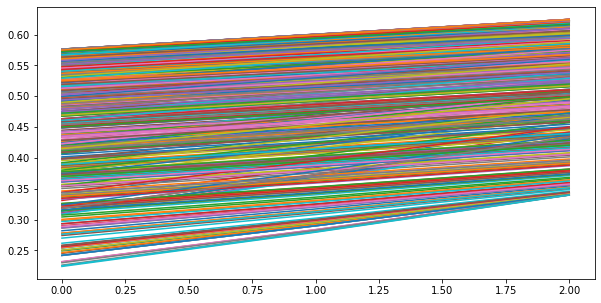

In [28]:
model = CmdStanModel(stan_file='logistic_regression.stan')
data_dict = dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 y = data.y.values
                 )
fit = model.sample(data=data_dict, seed=4938483)

med_prob_ppc = np.percentile(fit.stan_variable('prob_ppc'),[25,50,75],axis=0)

plt.figure(figsize=(10,5))
plt.plot(prob_ppc)
plt.show()

In [29]:
estimate_ppc_df = pd.DataFrame(med_prob_ppc.T,columns = ['lo','me','hi'])

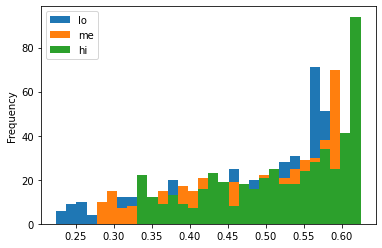

In [33]:
estimate_ppc_df.plot.hist(bins=30)
plt.show()

In [31]:
prob_ppc= fit.stan_variable('prob_ppc')
theta  = []

for i in prob_ppc:
    theta.append(np.mean(i))

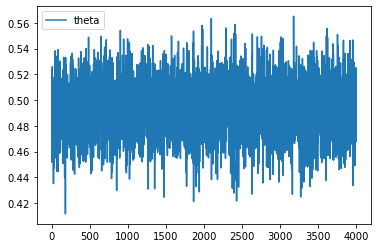

In [34]:
df_theta=pd.DataFrame({'theta':theta})
df_theta.plot()
plt.show()

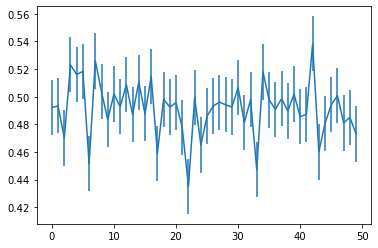

In [35]:
x=np.arange(0, 50, 1)

ax = plt.gca()
ax.errorbar(x, theta[0:50],0.02, 0.01)
plt.draw()
plt.show()